# Predicting Diamond Prices

## Phase 2: Statistical Modelling

### Group Name:  
- Group 36

### Name(s) & ID(s) of Group Members:
- Maansi Arora (s3885529)
- Om Khokhar (s3886577)
- Suhavni Mathur (s3874834)

## Table of Contents 
- [Introduction](#intro)
  - [Phase 1 Summary](#p1sum)
  - [Report Overview](#Rep_overview)
  - [Overview of Methodology](#meth_overview)
- [Statistical Modelling](#stat_model)
  - [Full Model Overview](#fm_overview)
  - [Model Fitting- Full Model](#fm_model_fit)
  - [Full Model Diagnostic Checks](#fm_dc)
  - [Backwards Feature Selection](#bfs)
  - [Reduced Model Overview](#rs_overview)
  - [Model Fitting- Reduced Model](#rs_model_fit)
  - [Reduced Model Diagonostic Checks](#rs_dc)
- [Neural Network Model-Fitting and Tuning](#nn)
- [Critique and Limitations](#cl)
- [Summary and Conclusions](#sc)
  - [Project Summary](#project_sum)
  - [Summary of Findings](#sum_findings)
  - [Conclusions](#conclusions)
  - [References](#refer)

## Introduction <a id='intro'></a>

### Phase 1 Summary <a id='p1sum'></a>

In Phase I, we selected an 'Airline Passenger Satisfaction' dataset and performed tasks like data cleaning & preprocessing and data visualisation. We decided to drop one of the redundant columns “onboard services” as it was very similar in purpose to the “In-flight services” column. We decided to drop rows with missing data for any of the variables and also changed one of the column’s data types. We made sure to check any outliers in columns like age and flight distance and other general outliers on columns based on ratings as the scale was specified to be 1-5. We also made some graphs to visualize, analyze and explore the pre-processed data.


#### Important Note for Phase 2 report: 
In Phase 1 our response variable was 'Customer Satisfaction' which is a categorical variable and cannot be predicted using multiple linear regression. Hence, we have decided to choose another dataset "Diamond" to proceed forward as its response variable is numeric which is 'Price'.

For data cleaning and preprocessing of the 'Diamonds' dataset, we have renamed x, y, z column names to length, width and height respectively to be understood more clearly. We then checked and removed any null values for length, width and height in the rows. We further removed the outliers from all the numeric variables. Finally, we randomly sampled 1000 rows from the initial dataset of 53000 rows.

Further, for Phase 2 we plan to predict the 'Price' within an acceptable margin of error using multiple linear regression primarily with just main effects. We took upon predicting the 'price' using Neural Network Modelling and Fine-Tuning.

<center><b>Description of variables for the 'Diamonds' dataset</b></center>

|Name of Variable | Type | Unit| Description| 
|:--- | :--- | :--- | :---|
|Carat | Numeric | ct | Unit of measurement used to measure the weight of a diamond, 200 grams is equivalent to one carat |
|Cut | Ordinal | NA |Categories of the quality of how a diamond is cut (good, ideal, premium, very good) | 
|Color | Ordinal | NA |Grades of a diamond color, ranges from J, the worst, to D, the best | 
|Clarity | Ordinal | NA |Measures how clear a diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) | 
|Depth | Numeric | % |total depth percentage = Height / mean(Length, Width) = 2 * Height / (Length + Width) | 
|Table | Numeric | mm |Measures the width of the top of a diamond between it's widest points | 
|Length | Numeric | mm |Measures the length of a diamond | 
|Width | Numeric | mm |Measures the width of a diamond | 
|Height | Numeric | mm |Measures the height of a diamond | 
|Price | Numeric | Dollars |Value of how much the diamond costs in dollars | 

### Report Overview <a id='Rep_overview'></a>

In our Phase 2 report, we have applied Statistical modelling techniques on the pre-processed dataset to predict the target variable 'price' using multiple linear regression. This will enable us to take a strategic approach to data analysis and create more accurate real-world forecasts. The goal of this study is to use predictive modelling approaches to investigate the link between explanatory and response variables. After using various modelling strategies such as backward feature selection, a statistical model will be created so that the end product is easy to grasp and any preset patterns may be observed. There will be certain constraints on its usability, as with many areas of data modelling, which will be described later in the report. We have also included a section at the end in which we predict our target variable using Neural Network Modelling and Fine-Tuning.

### Overview of Methodology <a id='meth_overview'></a>

To begin with we have acquired the pre-processed dataset and one-hot encoded all categorical variables and then formed a formula string for the full model. We have further used the Ordinary least squares (OLS) regression model which estimates the relationship between one or more independent variables and a dependent variable by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable. Then to visualize the results of the full model, we plotted the graph between actual and predicted 'prices'. Thereafter we would like to check whether there are indications of violations of the regression assumptions. We have also done backward feature selection which is used to remove those features that do not have a significant effect on the dependent variable or prediction of output. 

After the removal of all the insignificant variables we begin by again visualizing the results of the reduced model by plotting the graph between actual and predicted 'prices', residuals vs. predicted Price and residuals vs frequency which helps us to interpret that there is less variation between full model and the reduced model.

## Statistical Modelling <a id='stat_model'></a>

### Full Model Overview <a id='fm_overview'></a>
- Our full model begins by fitting a multiple linear regression that predicts the price of diamonds using all of the available features. 
- We have used 'one-hot encoding' for all categorical features.We then selected the 'Ordinary Least Squares' model to fit in our encoded data.
- We observe that our R-squared value turns out to be 0.917 which means that about 90% of the variance is explained by the model. Further 17 columns have a p-value of less than 0.05, while the other 6 columns have a p-value greater than 0.05 . 
- We then defined a new data frame for actual Price vs. predicted Price and the residuals for the full model which were later used for plotting predicted values and the regression residuals. 
- We then checked if there were any violations of regression assumptions and thereafter we continued with backwards feature selection and our reduced model. 
- Variables names used here are 'carat', 'cut' which includes categories like good, ideal, premium and very good, 'color' which  ranges from J- the worst, to D- the best, 'clarity' which include categories like I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best), 'depth', 'table', 'length', 'width', 'height' and 'price'. We have further done One-hot encoding for all the categorical variables.

### Model Fitting <a id='fm_model_fit'></a>

Now we begin with our Full Model. First let's take a quick peek at the clean data. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) 

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

df = pd.read_csv('Phase2_Group36.csv')
df = df.drop(columns='Unnamed: 0')
print('Shape of the dataset: ', df.shape)
df.head(5)

Shape of the dataset:  (1000, 10)


,carat,cut,color,clarity,depth,table,length,width,height,price
0,0.70,Ideal,E,SI1,62.8,55.0,5.65,5.69,3.56,2677
1,0.90,Premium,E,SI1,62.9,58.0,6.16,6.11,3.86,4158
2,0.31,Ideal,D,VS2,62.5,56.0,4.36,4.31,2.71,942
3,0.56,Ideal,H,SI1,61.6,56.0,5.29,5.33,3.27,1612
4,1.20,Premium,E,VVS1,60.6,60.0,6.95,6.85,4.18,14192


As all our variables are independent, we now form our regression formula simply adding and joining all the column names into a string. 

In [2]:
# Regression formula
formula_string_indep_vars = ' + '.join(df.drop(columns='price').columns)
formula_string = 'price ~ ' + formula_string_indep_vars
print('formula_string: ', formula_string)

formula_string:  price ~ carat + cut + color + clarity + depth + table + length + width + height


- To further do automatic variable selection with this formula we first need to perform 'One-hot encoding' of all the categorical variables. 
- For this, we first use the get_dummies function and then again form the regression formula string with the encoded variables.

In [3]:
# One-hot encoding for all the categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.columns = df_encoded.columns.str.lower().str.strip()
df_encoded.columns = df_encoded.columns.str.replace(' ', '_')
df_encoded.head()

,carat,depth,table,length,width,height,price,cut_good,cut_ideal,cut_premium,cut_very_good,color_e,color_f,color_g,color_h,color_i,color_j,clarity_if,clarity_si1,clarity_si2,clarity_vs1,clarity_vs2,clarity_vvs1,clarity_vvs2
0,0.70,62.8,55.0,5.65,5.69,3.56,2677,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0.90,62.9,58.0,6.16,6.11,3.86,4158,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.31,62.5,56.0,4.36,4.31,2.71,942,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.56,61.6,56.0,5.29,5.33,3.27,1612,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,1.20,60.6,60.0,6.95,6.85,4.18,14192,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [4]:
# Formula string with encoded variables
formula_string_indep_vars_encoded = ' + '.join(df_encoded.drop(columns='price').columns)
formula_string_encoded = 'price ~ ' + formula_string_indep_vars_encoded
print('formula_string_encoded: ', formula_string_encoded)

formula_string_encoded:  price ~ carat + depth + table + length + width + height + cut_good + cut_ideal + cut_premium + cut_very_good + color_e + color_f + color_g + color_h + color_i + color_j + clarity_if + clarity_si1 + clarity_si2 + clarity_vs1 + clarity_vs2 + clarity_vvs1 + clarity_vvs2


Now we will fit an OLS (Ordinary Least Squares) model to our encoded data.

In [5]:
model_full = sm.formula.ols(formula=formula_string_encoded, data=df_encoded)
###
model_full_fitted = model_full.fit()
###
print(model_full_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     470.8
Date:                Sun, 24 Oct 2021   Prob (F-statistic):               0.00
Time:                        04:40:59   Log-Likelihood:                -8282.1
No. Observations:                1000   AIC:                         1.661e+04
Df Residuals:                     976   BIC:                         1.673e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.018e+04   6498.391     -1.567

We observe that our R-squared value turns out to be 0.917 and the Adjusted R-squared value is 0.915 which means that about 90% of the variance is explained by the model. The greater R-square the better the model. Further 17 columns have a p-value of less than 0.05 which means that they are significant in predicting the 'Price', while the other 6 did not hold much significance. Since,  the p-value of most of our columns is less than the significance level (usually 0.05) so our model fits the data well.

Now we will define a new data frame for actual price vs. predicted price and the residuals for the full model. We will use this data frame later for plotting predicted values and the regression residuals.

In [6]:
residuals_full = pd.DataFrame({'actual': df_encoded['price'], 
                            'predicted': model_full_fitted.fittedvalues, 
                            'residual': model_full_fitted.resid})
residuals_full.head(10)

,actual,predicted,residual
0,2677,2821.431550,-144.431550
1,4158,4401.152398,-243.152398
2,942,885.475104,56.524896
3,1612,910.881684,701.118316
4,14192,8804.910206,5387.089794
5,776,577.364434,198.635566
6,5096,5159.917870,-63.917870
7,1046,1271.263713,-225.263713
8,5200,5344.532734,-144.532734
9,4672,4864.186470,-192.186470


Let's plot actual price values vs. predicted price values to visualize the variation.

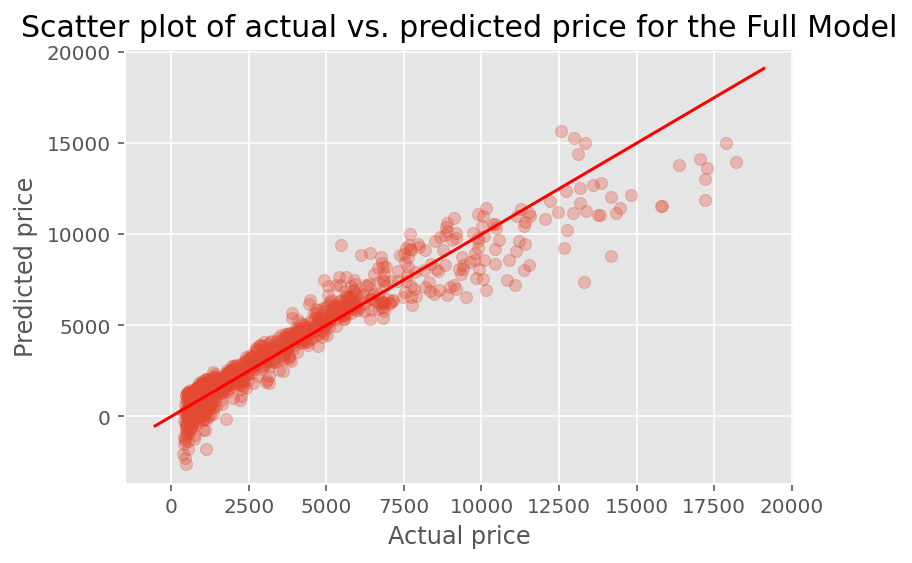

In [7]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)
    
# Creating scatter plot
plt.scatter(residuals_full['actual'], residuals_full['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual price');
plt.ylabel('Predicted price');
plt.title('Scatter plot of actual vs. predicted price for the Full Model', fontsize=15);
plt.show();

From the above graph, we observe that:
- The price prediction never goes above 16000 whereas the actual prices go up to 18211 dollars.
- The model has also predicted negative values for prices which is not possible.

### Full Model Diagnostic Checks <a id='fm_dc'></a>

We would like to check whether there are indications of violations of the regression assumptions, which are

- linearity of the relationship between target variable and the independent variables
- constant variance of the errors
- normality of the residual distribution
- statistical independence of the residuals

Now let's check for constant variability.

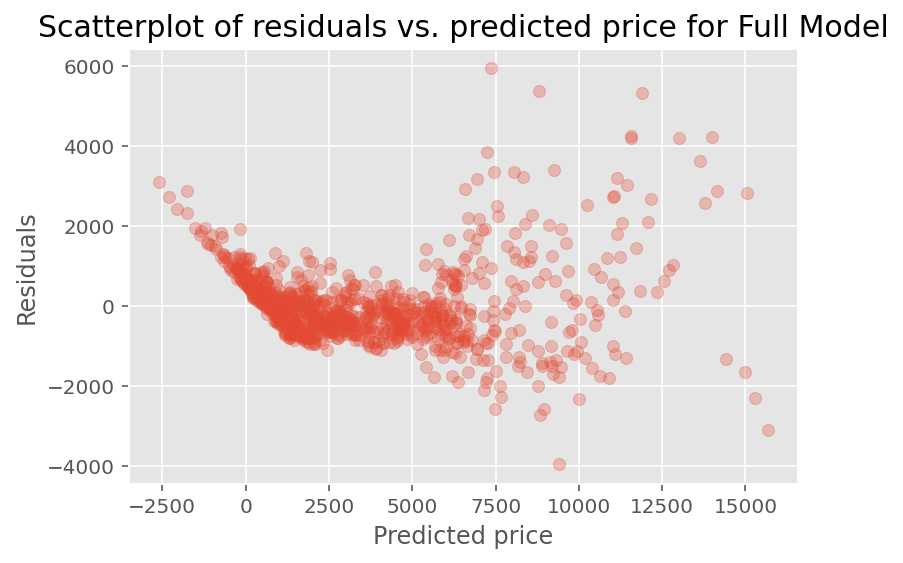

In [8]:
plt.scatter(residuals_full['predicted'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Predicted price');
plt.ylabel('Residuals')
plt.title('Scatterplot of residuals vs. predicted price for Full Model', fontsize=15)
plt.show();

In the above graph we observe that, instead of being mostly random, the predicted prices especially below the price of 5000 dollars have residuals mostly centered around 0. Whereas after 5000 we see some constant variability. Hence, This pattern indicates that the constant variability assumption of linear regression is somewhat satisfied in this case after a limit value of 5000 dollars.

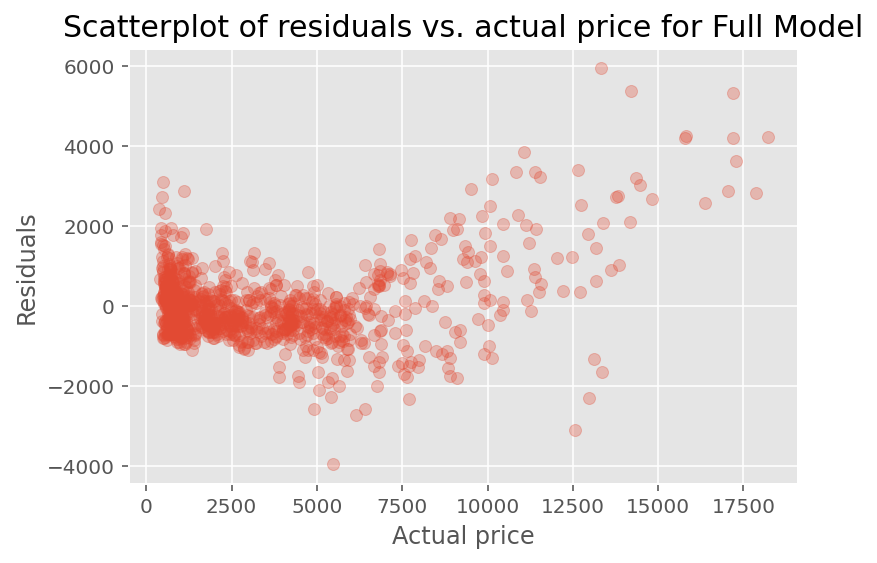

In [9]:
plt.scatter(residuals_full['actual'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Actual price');
plt.ylabel('Residuals')
plt.title('Scatterplot of residuals vs. actual price for Full Model', fontsize=15)
plt.show();

In the above graph we observe that,the model mostly underestimates the price for range 0 to 3000(not included), it overestimates most of the prices in the range of 3000 to 10000 whereas above 10000 the values are mostly underestimated.

Let's overlay the histograms of actual price vs. predicted price on the same plot.

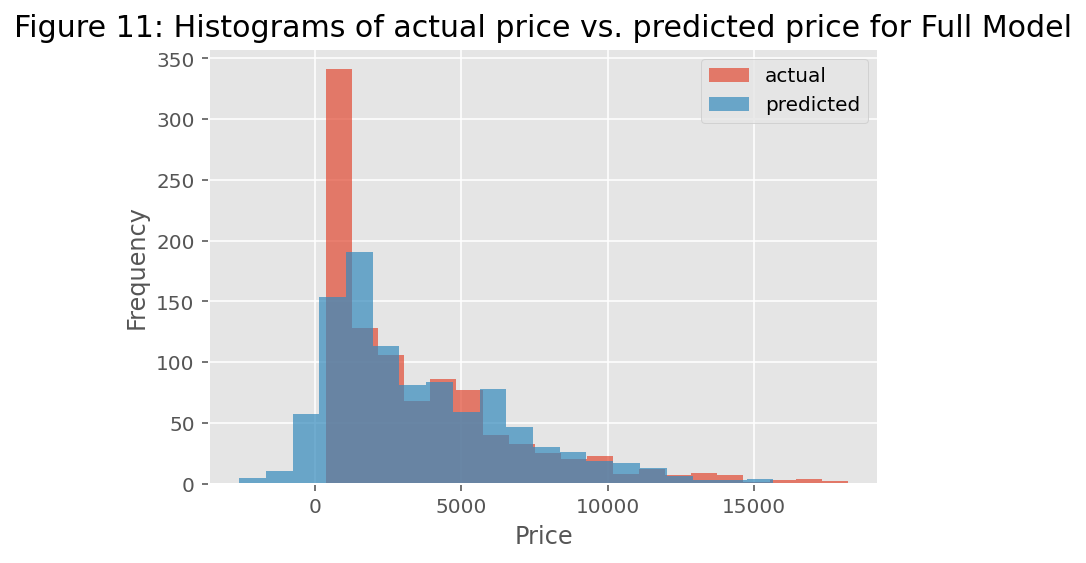

In [10]:
plt.hist(residuals_full['actual'], label='actual', bins=20, alpha=0.7);
plt.hist(residuals_full['predicted'], label='predicted', bins=20, alpha=0.7);
plt.xlabel('Price');
plt.ylabel('Frequency');
plt.title('Figure 11: Histograms of actual price vs. predicted price for Full Model', fontsize=15);
plt.legend()
plt.show();

Here we notice that the predicted prices include negative values whereas the actual prices start after 0. Also, the model's predictions are highly clustered between 0 dollars to 4000 dollars. For both the actual and the predicted prices the frequency gradually decreases as the prices increase. 

Let's now have a look at the histogram of the residuals.

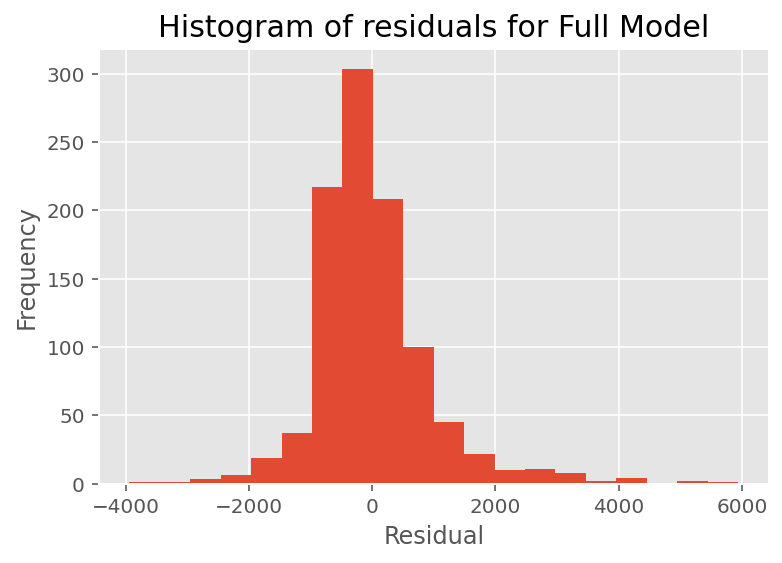

In [11]:
plt.hist(residuals_full['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Histogram of residuals for Full Model', fontsize=15);
plt.show();

We notice that the histogram of residuals looks somewhat symmetric, though slightly right-skewed. Nonetheless, it seems the normality assumption of linear regression is not significantly violated in this particular case.

### Backwards Feature Selection <a id='bfs'></a>

We now perform backwards feature selection using p-values in order to remove all the insignificant variables (if any).

In [12]:
## create the patsy model description from formula
patsy_description = patsy.ModelDesc.from_formula(formula_string_encoded)

# initialize feature-selected fit to full model
linreg_fit = model_full_fitted

# do backwards elimination using p-values
p_val_cutoff = 0.05

## WARNING 1: The code below assumes that the Intercept term is present in the model.
## WARNING 2: It will work only with main effects and two-way interactions, if any.

print('\nPerforming backwards feature selection using p-values:')

while True:

    # uncomment the line below if you would like to see the regression summary
    # in each step:
    #print(linreg_fit.summary())

    pval_series = linreg_fit.pvalues.drop(labels='Intercept')
    pval_series = pval_series.sort_values(ascending=False)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
    term_components = term.split(':')
    print(f'\nRemoving term "{term}" with p-value {pval:.4}')
    if (len(term_components) == 1): ## this is a main effect term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else: ## this is an interaction term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    
        
    linreg_fit = smf.ols(formula=patsy_description, data=df_encoded).fit()
    
###
## this is the clean fit after backwards elimination
model_reduced_fitted = smf.ols(formula = patsy_description, data = df_encoded).fit()
###
    
#########
print("\n***")
print(model_reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")


Performing backwards feature selection using p-values:

Removing term "length" with p-value 0.5303

Removing term "cut_good" with p-value 0.5381

Removing term "table" with p-value 0.06713

***
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     540.6
Date:                Sun, 24 Oct 2021   Prob (F-statistic):               0.00
Time:                        04:41:03   Log-Likelihood:                -8284.2
No. Observations:                1000   AIC:                         1.661e+04
Df Residuals:                     979   BIC:                         1.671e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
               

### Reduced Model Overview <a id='rs_overview'></a>

We start by visualising the findings of the reduced model again by plotting the graph between actual and predicted 'prices', residuals vs. predicted price, and residuals vs. frequency, which helps us comprehend that there is less difference between the full model and the reduced model.

### Model Fitting <a id='rs_model_fit'></a>

We now define a new data frame for actual price vs. predicted price and the residuals for the reduced model.

In [13]:
residuals_reduced = pd.DataFrame({'actual_reduced': df_encoded['price'], 
                            'predicted_reduced': model_reduced_fitted.fittedvalues, 
                            'residual_reduced': model_reduced_fitted.resid})
residuals_reduced.head(10)

,actual_reduced,predicted_reduced,residual_reduced
0,2677,2802.969780,-125.969780
1,4158,4402.402514,-244.402514
2,942,911.140175,30.859825
3,1612,898.338152,713.661848
4,14192,8875.564595,5316.435405
5,776,525.295817,250.704183
6,5096,5239.795134,-143.795134
7,1046,1301.289970,-255.289970
8,5200,5322.761488,-122.761488
9,4672,4835.026441,-163.026441


We will now plot the graph for Actual Price vs Predicted Price for the reduced model to visualize the residuals.

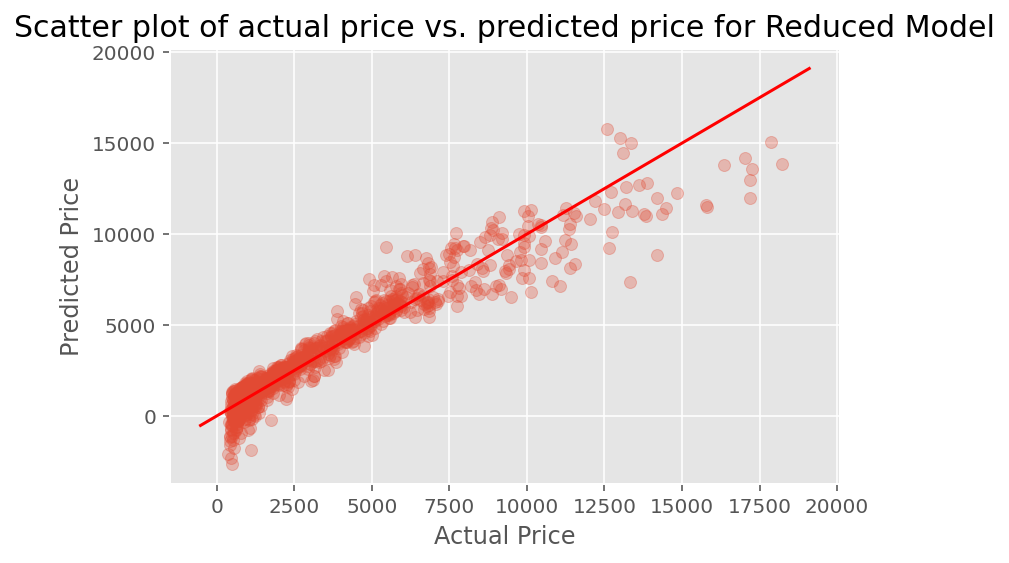

In [14]:
# get a scatter plot
plt.scatter(residuals_reduced['actual_reduced'], residuals_reduced['predicted_reduced'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual Price');
plt.ylabel('Predicted Price');
plt.title('Scatter plot of actual price vs. predicted price for Reduced Model', fontsize=15);
plt.show();

This model returns an Adjusted R-squared of 0.915, meaning the reduced model still explains about 91% of the variance, but with 3 less variables. Looking at the p-values, they are all significant at the 5% level, as expected. We still have the same issues with our model. That is, the model mostly underestimates the price for range 0 to 3000(not included), it overestimates most of the prices in the range of 3000 to 10000 whereas above 10000 the values are mostly underestimated.

### Reduced Model Diagnostic Checks <a id='rs_dc'></a>

Let's first get a scatter plot of residuals (as a function of predicted price).

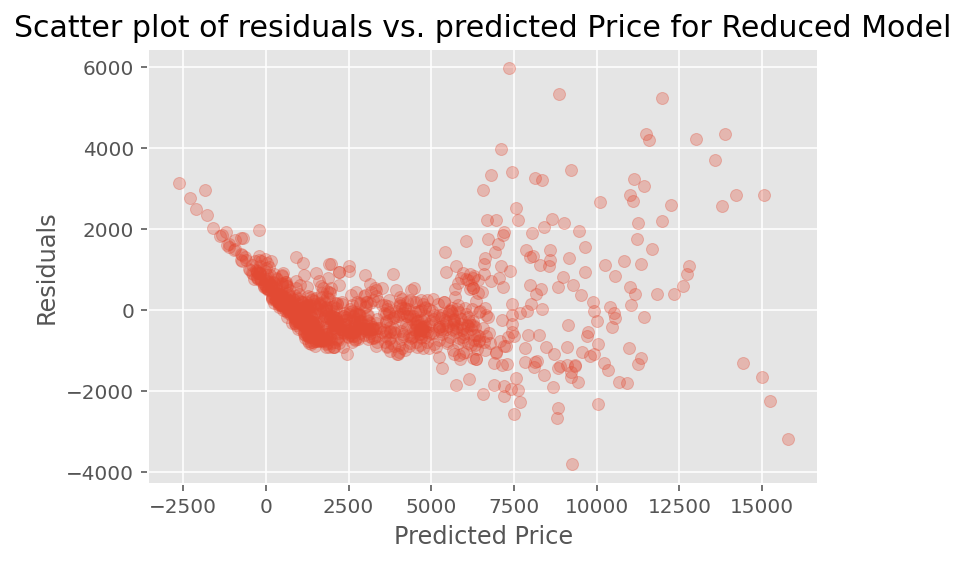

In [15]:
plt.scatter(residuals_reduced['predicted_reduced'], residuals_reduced['residual_reduced'], alpha=0.3);
plt.xlabel('Predicted Price');
plt.ylabel('Residuals')
plt.title('Scatter plot of residuals vs. predicted Price for Reduced Model', fontsize=15)
plt.show();

We see that, rather than being mainly random, the forecasted prices, particularly those below $5,000, have residuals that are mostly centred around 0. After 5000, though, there is some consistent fluctuation. As a result, this pattern implies that the linear regression constant variability assumption is partially met in this example after a limit value of 5000 dollars.

Now let's plot the histogram of the residuals for the reduced model.

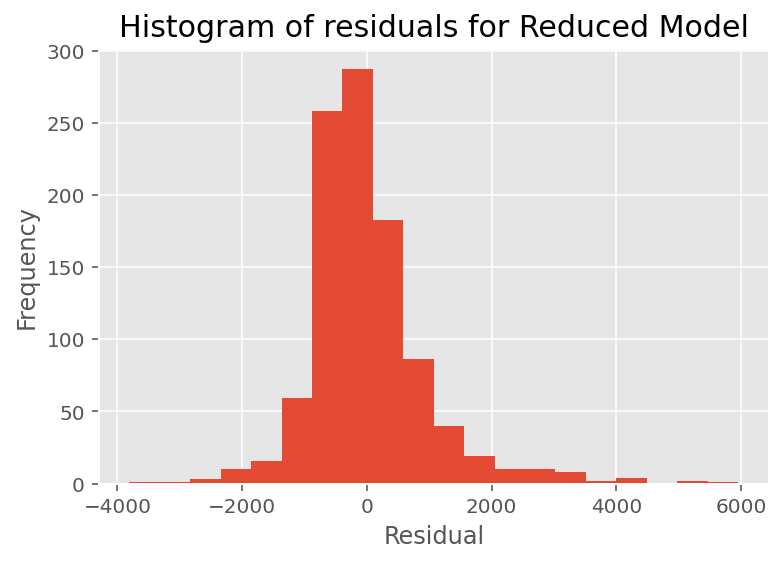

In [16]:
plt.hist(residuals_reduced['residual_reduced'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Histogram of residuals for Reduced Model', fontsize = 15)
plt.show();

Here we notice that, there is again a somewhat symmetric histogram around zero, which suggests that the residuals are somewhat normally distributed.

## Neural Network Model Fitting and Tuning <a id='nn'></a>

In this section, we will model our encoded dataset using neural networks to predict the price of diamonds. 

- We start by splitting the sampled data as 70% training set and the remaining 30% validation set using a random seed of 999.
- Then we will normalize the target feature and other independent variables.

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Splitting the target from the dataset
Data = df_encoded.drop(columns=['price'])
target = df_encoded['price'].values.reshape(-1, 1) 

# scaling all the independent variables to be between 0 and 1 in case they are not
scaler_Data = MinMaxScaler().fit(Data.values)
Data_scaled = scaler_Data.transform(Data.values)

# scaling the target feature.
scaler_Target = MinMaxScaler().fit(target)
Target_scaled = scaler_Target.transform(target)

In [18]:
# 70% training set and 30% validation set
D_train, D_test, t_train, t_test, idx_train, idx_test = \
   train_test_split(Data_scaled, target, Data.index, test_size=0.3, random_state=999)

Now, we define the number of neural units in each hidden layer.

In [19]:
layer1_units = 4
layer2_units = 4

Now we will import the necessary modules.

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, roc_auc_score
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import mean_squared_log_error

We now choose our hyperparameters which we would like to use in model tuning. 

In [21]:
# computes the mean squared logarithmic error between y_true and y_pred.
loss = 'mean_squared_logarithmic_error' 
metrics = ['mean_squared_logarithmic_error'] 

In [22]:
epochs = 10      # indicates the number of passes of the entire training dataset the machine learning algorithm has completed
batch_size = 30  # the number of training examples utilized in one iteration

In [23]:
# Activation functions
layer1_activation = 'relu'
layer2_activation = 'relu'
output_activation = 'sigmoid'

In [24]:
# dropout refers to ignoring units (i.e. neurons) during the training phase of certain set of neurons which is chosen at random.
layer1_dropout_rate = 0.00
layer2_dropout_rate = 0.00

In [25]:
learning_rate=0.001 # step size at each iteration while moving toward a minimum of a loss function
decay=1e-6          # regularization technique applied to the weights of a neural network
momentum=0.5        # a variant of the stochastic gradient descent

# SGD stands for stochastic gradient descent
optimizer = SGD(lr=learning_rate, decay=decay, momentum=momentum)

The code below sets up the NN model based on the specified input parameters.

In [26]:
def model_factory(input_dim, layer1_units, layer2_units):
    model = Sequential()
    model.add(Dense(layer1_units, input_dim=input_dim, activation=layer1_activation))
    model.add(Dropout(layer1_dropout_rate))
    model.add(Dense(layer2_units, activation=layer1_activation))
    model.add(Dropout(layer2_dropout_rate))
    model.add(Dense(1, activation=output_activation))
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    return model

Now, we will define a function to plot performance of the NN during training. We will plot the performance of both the training data and the validation data.

In [27]:
# fine-tuning plot for epochs vs metrics
def plot_history(history): 
    plt.plot(history.history['mean_squared_logarithmic_error'])
    plt.plot(history.history['val_mean_squared_logarithmic_error'])
    plt.title('Model Mean Squared Log Error')
    plt.ylabel('Mean Squared Log Error')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='lower right')
    plt.show()

Now we will train our model.

In [28]:
model_test = model_factory(Data.shape[1], layer1_units, layer2_units)
model_test.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 96        
_________________________________________________________________
dropout (Dropout)            (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [29]:
%%time
history_test = model_test.fit(D_train, 
                              t_train,
                              epochs=epochs,
                              batch_size=batch_size,
                              verbose=1, # setting it to 1 for iteration details
                              shuffle=True,
                              validation_data=(D_test, t_test))

Epoch 1/10
24/24 [==============================] - 2s 53ms/step - loss: 54.2409 - mean_squared_logarithmic_error: 54.2409 - val_loss: 53.7536 - val_mean_squared_logarithmic_error: 53.7536
Epoch 2/10
24/24 [==============================] - 1s 26ms/step - loss: 53.5889 - mean_squared_logarithmic_error: 53.5889 - val_loss: 53.0951 - val_mean_squared_logarithmic_error: 53.0951
Epoch 3/10
24/24 [==============================] - 0s 5ms/step - loss: 52.9825 - mean_squared_logarithmic_error: 52.9825 - val_loss: 52.5423 - val_mean_squared_logarithmic_error: 52.5423
Epoch 4/10
24/24 [==============================] - 0s 5ms/step - loss: 52.4860 - mean_squared_logarithmic_error: 52.4860 - val_loss: 52.1087 - val_mean_squared_logarithmic_error: 52.1087
Epoch 5/10
24/24 [==============================] - 0s 5ms/step - loss: 52.0995 - mean_squared_logarithmic_error: 52.0995 - val_loss: 51.7806 - val_mean_squared_logarithmic_error: 51.7806
Epoch 6/10
24/24 [==============================] - 0s 7ms

In [30]:
# here are the keys in the history attribute of the fitted model object
history_test.history.keys()

dict_keys(['loss', 'mean_squared_logarithmic_error', 'val_loss', 'val_mean_squared_logarithmic_error'])

We will now plot our results.

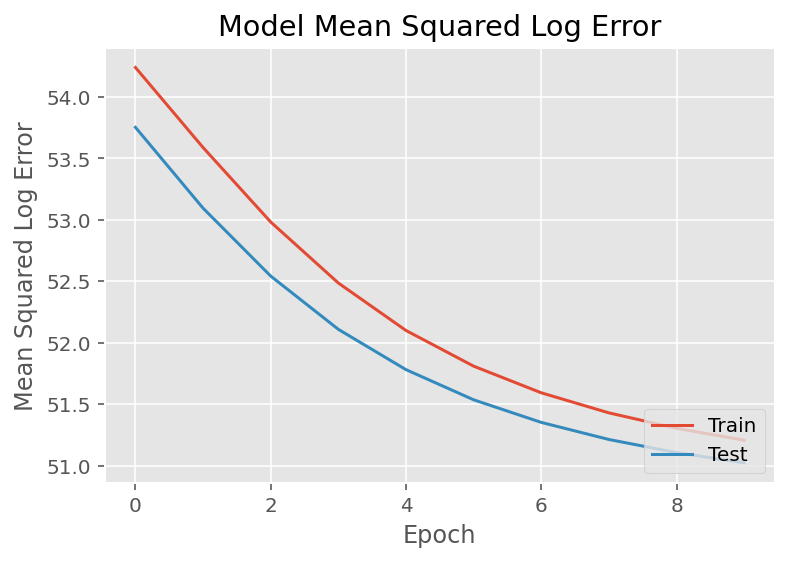

In [31]:
plot_history(history_test) # fine-tuning plot

We now look at the predictions on the validation data and have a look at it's accuracy.

In [32]:
# compute prediction performance on test data
model_output = model_test.predict(D_test).astype(float)

# decide classification based on threshold of 0.5
t_pred = np.where(model_output < 0.5, 0, 1)

# set up the results data frame
result_test = pd.DataFrame()
result_test['target'] = t_test.flatten()
result_test['fit'] = t_pred
# residuals will be relevant for regression problems
result_test['abs_residual'] = np.abs(result_test['target'] - result_test['fit'])
result_test.head()

,target,fit,abs_residual
0,3799,1,3798
1,912,1,911
2,918,1,917
3,11405,1,11404
4,2922,1,2921


In [33]:
msle = mean_squared_log_error(result_test['target'], result_test['fit'])
print(f"Validation data mean_squared_log_error = {msle:.3f}")

Validation data mean_squared_log_error = 50.562


Neural Networks (NNs) are at the heart of modern machine learning. They have been used successfully at solving some of the most challenging machine learning problems in the world including image and video recognition, speech recognition, and generative adversarial network problems. 

Through our Neural Network model, we wanted to predict the target variable of our dataset which is 'price'. We begin by scaling our data and target variable to bring each value between 0 and 1 (in-case it is not). Then we divide the dataset in 2 parts of 70% data and 30% data for training and validation respectively. Firstly, the input layer will accept the data and pass it to the rest of the network. Next, we have 2 hidden layers for which we define the number of neurons to be 4, this is the topology of our neural network model. The hidden layer then transfers the data to the output layer which is responsible for holding the result or the output for our prediction. We then import some of the keras and tensorflow modules which together make this process as simple as it can possibly be and by far the two most popular DL tools out there at the moment.

For the hidden layers, in addition to how many neurons we want in each layer, we also specified the type of activation functions we will use for each of them. For the hidden layers, we have used 'relu' which is short for rectified linear unit whereas for the output layer we have used 'sigmoid' which always returns the value between 0 and 1. Dropout is a technique used to prevent a model from over-fitting. Thereafter we set the outgoing edges of hidden units (dropout technique) to 0 at each update of the training phase. We have further taken the following hyper-parameters which are- epochs (indicates the number of passes of the entire training dataset the machine learning algorithm has completed), batch-size (the number of training examples utilized in one iteration), loss, metrics, decay (regularization technique applied to the weights of a neural network), momentum (a variant of the stochastic gradient descent), optimizer (method used to change the attributes of our neural network) and learning-rate (step size at each iteration while moving toward a minimum of a loss function). It is within the nodes of the hidden layers that the weights are applied. These weights form the parameters of our neural network model which are further influenced by the hyper-parameters being used.

We then begin by preparing the Sequential model which is created by passing a list of layers to the sequential constructor. Once a model is "built", we call its summary() method to display its contents which includes the layer, it's output shape and its respective parameters. We then train the model and then start to plot the performance of both the training data and the validation data by plotting a fine-tuning graph between the epochs and metrics. Then we compute prediction performance on test data and decide it's classification based on a threshold of 0.5. 

One of the limitations that we consider is having a small dataset for both training and validation but this can be certainly overcome by randomly sampling a larger number of rows from our original pre-processed dataset. Also, for enhancing the accuracy of the model we could use more hyper-parameters. 






## Critique & Limitations <a id='cl'></a>

The statistical model that we have used is a combination of strengths and limitations. Let's begin by enlisting the strengths of our model which includes the accuracy of our statistical model which is quite high as our Adjusted R-squared value is 0.915. Also, the residuals in our statistical model are low in comparison to the high actual values. Apart from that, our predicted price values are pretty precise because the reduced model includes only the variables with p-value below 0.05 because other insignificant ones were removed.

Weaknesses of our model include negative predictions for prices of diamonds, which is not practically possible. Also, since our dataset is small with just 1000 rows, the neural network might not be very precise. 

Analysis-  Our data is not extremely skewed and so we didn't prefer performing log transformation but incase of skewness, it should be done to fit the model better.


## Summary & Conclusions <a id='sc'></a>

### Project Summary <a id='project_sum'></a>

We started with the selection of an appropriate dataset 'Diamonds', which has a numerical target variable 'price'. 
To prepare our data for modelling, we started by cleaning and pre-processing our data by altering the x, y, and z column names to length, width, and height respectively. The null values for length, width, and height in the rows were then checked and eliminated. Outliers were also deleted from all numeric variables. Further, we choose 1000 rows at random from the baseline dataset of 53000 rows. 

NOTE: We previously did data visualization for our initially chosen 'Airline Passenger Satisfaction' dataset which included univariate and multi-variate graphs. We had to drop that dataset because it's target feature was a categorical one which couldn't be used for multiple linear regression. 

We then proceeded with statistical modelling using multiple linear regression techniques in order to predict our response variable 'price'. We started with one-hot encoding of all categorical variables, after which we created a formula string for the full model. Following that, we checked for any indicators of regression assumptions violations. We then drew the graph between actual and predicted 'prices' to visualise the full model's results. We've also employed backward feature selection to exclude features that don't have a meaningful impact on the dependent variable or output prediction. We then visualize the findings of the reduced model again by plotting the graph between actual and predicted 'prices,' residuals vs. predicted Price, and residuals vs. frequency, which helps us comprehend that there is less difference between the full model and the reduced model.

We have also included a section for Neural Network Model-Fitting and Fine-Tuning and discussed about our model's topology, parameters, hyper-parameters and a fine-tuning plot.

### Summary of Findings <a id='sum_findings'></a>

Our statistical model's accuracy is pretty excellent, as seen by our Adjusted R-squared score of 0.915. Furthermore, our statistical model's residuals are low in comparison to the high actual values. Apart from that, our predicted price values are pretty precise because the reduced model includes only the variables with p-value below 0.05 because other insignificant ones were removed. Having only a small number of insignificant variables suggests that most variables are significantly participating in predicting the 'price' accurately. Also after doing the diagnostic checks we can say that our model mostly satisfies the assumption of constant variability (above a limit value) and also satisfies the normality condition.

### Conclusion <a id='conclusions'></a>

The main aim of the project was to determine the actual price of diamonds by using various variables such as 'Carat, Cut, Color, Clarity, Depth, Table, Length, Height, Width' most of which are significant in deciding the price of the diamonds. We also tried to implement Neural Network Model-Fitting and Tuning for the prediction of our target variable 'price'.

As a result of this project, we learnt how to utilise statistical methods to explore, analyse, and model data, as well as how to use these approaches to test statistical hypotheses using Python programming.

## References <a id='refer'></a>

- Agrawal, S. (2017) Diamonds. Retrieved 18 October 2021 from https://www.kaggle.com/shivam2503/diamonds
- Dr. Aksakalli, V. (21 October 2021) Phase 2 report template. Retrieved 21 October 2021 from https://github.com/vaksakalli/stats_tutorials/blob/master/Phase2_Report_Template.ipynb
- Dr. Aksakalli, V. (29 October 2020) Regression Case Study 1 web. Retrieved 18 October 2021 from https://github.com/vaksakalli/stats_tutorials/blob/master/Phase2_Report_Template.ipynb
- Dr. Aksakalli, V. (15 October 2021) SK7. Retrieved 21 October 2021 from https://github.com/vaksakalli/ml_tutorials/blob/master/SK7.ipynb
- https://keras.io/api/losses/
- https://keras.io/api/metrics/
- https://keras.io/api/models/model_training_apis/
- https://keras.io/examples/#structured-data
- https://keras.io/guides/sequential_model/#:~:text=A%20Sequential%20model%20is%20appropriate,%22layer1%22)%2C%20layers
- https://deepai.org/machine-learning-glossary-and-terms/weight-artificial-neural-network
- https://datascience.stackexchange.com/questions/17635/model-parameters-hyper-parameters-of-neural-network-their-tuning-in-training
- https://www.analyticsvidhya.com/blog/2021/05/tuning-the-hyperparameters-and-layers-of-neural-network-deep-learning/#:~:text=The%20hyperparameters%20to%20tune%20are,layers%20can%20affect%20the%20accuracy.